In [1]:
import tensorflow as tf
from tensorflow import keras

keras.__version__

'2.7.0'

### Keras를 통해 데이터셋 적재하기

* Keras를 통해 패션 MNIST 데이터셋을 다뤄본다
* 각 이미지의 크기는 28 * 28의 배열 
* 픽셀은 0 ~ 255 까지의 실수

In [4]:
#데이터 불러오기
fm = keras.datasets.fashion_mnist
(X_train_full , y_train_full),(X_test, y_test) = fm.load_data()

In [5]:
X_train_full.shape
#확인해본 결과 다음과 같은 결과로 나옴

(60000, 28, 28)

* 이미 제공된 데이터셋은 Train , Test로 나뉘어져 있음
* Validation set이 없기 때문에 인위적으로 만들 필요가 있음
* 또한 경사하강법을 통한 신경망 훈련이기 떄문에 입력 단위의 Scale을 조정해야함
* 이경우 단순하게 255로 나누어 0 ~ 1 사이로 픽셀 Scale을 조정함
* 당연하게도 이후 사용되는 새로운 데이터들에도 같은 Scale을 적용해야함

In [6]:
#Validation set 만들기 , 5000개와 55000개
X_valid , X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test / 255.0

In [8]:
#의류 종류에 대해 분류하기 위해 class를 만듬

class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt",
               "Sneaker","Bag","Ankle boot"]

class_names[y_train[0]]
#예를 들어 train set의 0번 레이블의 경우 coat다.

'Coat'

In [9]:
#MultiLayer Perceptron, MLP - 2 hidden layer
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

* 먼저 Keras의 가장 간단한 신경망 모델인 Sequntial 모델을 만든다.
* 이는 단순하게 층을 일렬로 쌓은 모델이다.
<br><br>
* Flatten을 통해 이미지를 입력으로 받는다.
* 모델 파라미터도 없고 , 간단한 전처리를 수행한다.
* 모델의 첫번째 층이므로 , input_shape을 지정해야 한다.
* 배치 사이즈를 제외하고 샘플의 크기만 사용하고 이외의 방법으로 keras.layers.InputLayer으로도 사용할 수 있다.
<br><br>
* 이후 300개의 뉴런을 가진 Dense hidden layer를 추가한다.
* 사용 활성함수는 ReLU다. 
* 각각의 Dense 층들은 각자의 가중치 행렬을 관리하고 , bias 도 벡터로 관리한다. 즉 weight와 bias 모두 행렬과 벡터 형식으로 관리한다는 것이다.
* 이후 뉴런 100개를 가진 Dense hidden layer를 아래에 붙인다.
* 마지막으로 뉴런을 10개가진 Dense layer를 추가하고 이 layer가 최종 Output layer가 된다. 
* 배타적인 classification 이므로 softmax 함수를 activation function으로 사용한다.
* 최종적인 NN 모델은 28*28 입력 층 -> 2개의 hIdden layer (300 , 100) -> Output layer (10개 구분하므로 10개의 뉴럴) 로 정리된다.


In [10]:
#위와 같은 코드 
#Sequntial 모델의 경우 다음과 인자에 리스트를 전달 해서도 만들 수 있다.

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
  ])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


* model에 summary() 메소드를 통해 모델의 층을 확인 할 수 있다.
* Dense 층은 보통 많은 parameter를 가진다.
* 첫번째 dense 층의 경우 입력으로 들어오는 784개의 입력에 대해 300개의 뉴럴이 있으므로 784 * 300 개 만큼의 weight가 있다.
* 여기에 각 뉴럴마다 bias 역시 존재하므로 총 235500개의 parameter가 존재하게 된다.
* 이처럼 weight나 bias의 수가 많다는 것은 모델의 flexibility가 크다는 것을 의미하지만 , 당연하게도 모델의 flexibility가 크면 Overfitting의 가능성이 존재한다. 즉 충분한 데이터의 양이 보장되어야 Overfitting을 피할 수 있다.



In [12]:
#모델의 layer를 인덱스로도 선택 가능하고 확인 가능하다.

model.layers

In [15]:
model.layers[2].name

'dense_4'

In [18]:
#각 층에 대한 파라미터들은 get_weights() 와 set_weight() 메소드로 접근이 가능하다.
#아래의 코드 예시와 같이 get_weights()를 통해 weight와 bias 모두 접근 가능하다.

weight, bias = model.layers[1].get_weights()
weight

array([[-0.06637845,  0.00869625, -0.03596747, ..., -0.00371069,
         0.04780079,  0.01165803],
       [ 0.04360663, -0.03799567,  0.04808863, ...,  0.03029907,
        -0.05783149,  0.00799306],
       [-0.04221347,  0.02728531,  0.04899614, ...,  0.02455316,
        -0.03212978, -0.06892749],
       ...,
       [-0.00745593,  0.04390582,  0.0183312 , ...,  0.02503217,
        -0.07115501, -0.04792337],
       [-0.06052386, -0.0654074 ,  0.01508966, ...,  0.02591585,
        -0.02830314, -0.0536991 ],
       [ 0.01827636, -0.07332236, -0.05261526, ..., -0.01299351,
        -0.01725402, -0.06342798]], dtype=float32)

In [19]:
bias.shape

#weight.shape / bias.shape 모두 확인 가능

(300,)

* Dense 층은 weight를 무작위로 초기화 하는 random initialization 방식을 사용한다. initialization 역시 중요하므로 다른 방식을 사용할 수 있다.
* 방법은 층을 만들때 kernel_initializer와 bias_initializer ( kernel = weight를 의미한다)를 통해 사용가능하다.
<br><br>
* weight 행렬의 크기는 입력의 크기에 달려있다. 따라서 첫번째 층에서 input_shape가 들어간 것이다.
* 이후 모델을 다 만들었다면 , compile() 메소드를 통해 사용할 Loss function과 optimizer를 지정해야한다. 

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

* 분류 문제의 label은 0 ~ 9 까지의 정수로 되어있다.
* 따라서 sparse_categorical_crossentropy 즉 다중 분류 손실 함수를 사용한다.

# sparse_categorical_crossentropy
* integer type 클래스
* one-hot encoding하지 않고 정수 형태로 label 사용
* 하나의 샘플에 여러 클래스가 있거나, label이 soft 확률일 경우에 사용
<br><br>

만약 lable이 샘플마다 어떠한 class로 분류될 확률을 가지고 있는 형태라면 categorical_crossentropy를 사용해야 할 것이다.

# categorical_crossentropy
* 다중 분류 손실 함수
* Output이 one-hot encoding된 결과로 나오기 떄문에 label을 one-hot encoding 해야함
* 클래스가 상호 배타적일 경우,즉 한 샘플에 한 클래스만 속해있는 경우 사용
<br><br>

또한 , 이진 분류나 다중 레이블 이진 분류의 경우 softmax 대신 sigmoid를 , 또 binary_crossentropy를 사용해야 할 것이다.

# binary_crossentropy
* binary 다중 분류 손실 함수
* 각각의 label들이 독립적일 때 사용

# sgd
* optimizer에 sgd를 지정하면 기본 확률적 경사 하강법 (back propagation)을 사용하여 모델을 훈련한다.
* sgd optimizer는 학습률을 튜닝하는 것이 중요한데 , 보통 optimizer = keras.optimizers.SGD(lr=???)와 같이 사용한다.
* default값은 lr=0.01 이다.

In [21]:
#모델을 훈련하고 평가할 단계이다.
#모델의 훈련은 fit() 메소드를 통해 이루어진다.

history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

#위 코드에서 볼 수 있듯이 , fit() 메소드 안에는
#Train x, y 와 epochs , 또 validation set까지 인자로 들어간다. (vali는 선택인자)
#epochs는 모델에서 학습의 횟수를 의미한다.
#epoch를 지정하지 않는다면 디폴트인 1로 지정되어 좋은 결과가 나오지 않을 것이다.
#validation set을 직접 만들어 넣지 않고 비율로 validation_split=0.1 (10%) 이런식으로 비율로 둘 수도 있다.

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7377 - accuracy: 0.7553 - val_loss: 0.5339 - val_accuracy: 0.8188
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4901 - accuracy: 0.8290 - val_loss: 0.4726 - val_accuracy: 0.8308
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4434 - accuracy: 0.8443 - val_loss: 0.4447 - val_accuracy: 0.8488
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4173 - accuracy: 0.8532 - val_loss: 0.4389 - val_accuracy: 0.8488
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3967 - accuracy: 0.8598 - val_loss: 0.3832 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3821 - accuracy: 0.8664 - val_loss: 0.3975 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3672 - accuracy: 0.8704 - val_loss: 0.3645 - val_accuracy:

# validation과 train

* 만약 결과를 확인했을때 , train set의 결과가 validation의 결과보다 월등히 높다면 overfitting을 의심해볼 수 있다.
* keras는 해당 epoch 과정에 대해 처리한 샘플의 개수 , 샘플마다 걸린 평균 훈련시간 , train set과 validation set에 대한 loss와 accuaracy 등 다양한 지표들을 출력한다.
* 위의 경우를 통해서 살펴본 결과 loss가 점점 줄고있는 것이 보이므로 , 좋은 신호다.

#결과
* 만약 편향된 train set 즉 , 어떤 class는 많고 어떤 class는 적고 이러한 데이터 셋을 이용한다면 fit() 메소드 사용시 class_weight 인자를 지정하는 것이 좋다. 즉 적게 등장하는 class에는 높은 가중치를 부여해주고 , 많이 등장하는 class에는 낮은 가중치를 부여하는 것이다.
* fit() 메소드가 반환하는 객체에는 Train parameter ( 객체.params ) , 수행된 에포크의 리스트 ( 객체.epoch )가 포함되어있다.
* 중요한 부분은 epoch가 끝날때 마다 validation set과 train set에 대한 loss와 측정한 지표에 대한 정보를 담은 ( 객체.history ) 딕셔너리다.
* 이를 통해 그래프를 그려 신경망에 대한 개선점을 찾을 수 있다.

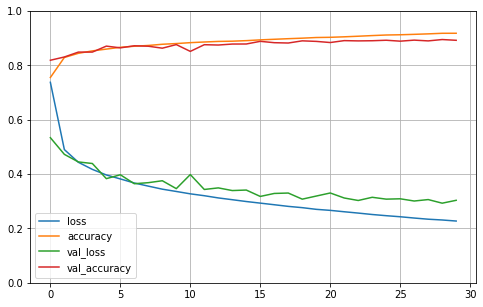

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

* 확인할 부분은 accuracy 부분이다.epoch에 따라 train을 진행하는 동안 꾸준히 상승했으므로 , 괜찮게 나왔다.
* loss와 validation loss 역시 감소하므로 이 역시 좋은 경우다.
* 또한 validation의 곡선이 train 곡선과 유사하므로 이 역시 overfitting이 발생하지 않았다고 볼 수 있다.
* validation의 성능이 더 좋아보이지만 , validation loss는 epoch가 끝난 후 계산되는 반면 train loss는 epoch가 진행되는 도중 계산된다. 따라서 train 곡선은 epoch의 절반만큼 왼쪽으로 이동시켜 보아야 한다. 이렇게 확인하면 훈련 초기 역시 train과 validation 곡선이 어느정도 일치하는 것을 볼 수 있다.

# 모델의 성능과 수렴
* 모델의 val_loss가 계속 감소한다면 모델이 아직 수렴하지 않았다고 볼 수 있다.
* 또한 모델의 성능이 만족스럽지 않다면 hyper parameter를 몇가지 조정해야 할텐데 다음과 같이 조정할 수 있다.

# hyper parameter 조정
* 학습률 : optimizer , 다른 hyper parameter를 바꾼 후 학습률을 다시 튜닝해야함
* 층 개수
* 층의 뉴런 개수
* hidden layer의 activation function
* batch size ( fit()에서 batch_size로 지정하지 않을 시 기본 32)
<br><br>
이후 만족할만한 성능이 나왔다고 판단되면 test set을 통해 모델을 평가한다.


In [24]:
model.evaluate(X_test,y_test)
#evaluate() 메소드를 통해 test 한다.

313/313 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.8823


[0.3337719440460205, 0.8823000192642212]

* 당연하게도 test accuracy는 validation 보다 낮다.
* hyper parameter튜닝이 test set이 아닌 validation set에서 이루어졌기 떄문이다.
* test set에서 hyper parameter를 과하게 튜닝하려 하면 일반화 오차에 대해 낙관적으로 추정하게 된다.
* test set에 대해서도 어느정도 괜찮은 성능이 나오면 실제로 predict 해볼 수 있다.

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

#위의 결과는 data에 대해 0 ~ 9번 class일 확률을 보여준다.
#확률값에 대해서 가장 높은 확률을 가진 class를 보고 싶다면 predict_classes() 메소드를 통해
#하나만 딱 분류하도록 할 수도 있다.

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
import numpy as np
#y_pred = model.predict_classes(X_new)

#위의 코드와 같은 결과
y_prob = model.predict(X_new, verbose=0) 
y_pred = y_prob.argmax(axis=-1)

np.array(class_names)[y_pred]

#tensorflow 2.6 이상 부터는 y_pred = model.predict_classes(X_new) 에서 처럼
#classes()가 없어 오류가 난다.

#y_prob = model.predict(X_new, verbose=0) 
#y_pred = y_prob.argmax(axis=-1)
#가 같은 역할을 수행한다.

#ref : https://leunco.tistory.com/16


#실제로 그림을 보고 맞는지 확인하자.



array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

In [30]:
y_test[:3]
#9 2 1 로 맞는 것을 볼 수 있다.

array([9, 2, 1], dtype=uint8)